In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
pip install tensorflow

In [2]:
import pandas as pd
df = pd.read_csv("SARCASMMMIXEDD.csv",on_bad_lines='skip')
df.head(10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,1,"I, for one, welcome this - it could lead to a ...",InitiumNovum,Anarcho_Capitalism,-1.0,-1.0,0.0,2015-09,9/22/2015 2:02,Ex-hedge funder buys rights to AIDS drug and r...
1,0,This is true,kyo_nimous_,Colts,1.0,1.0,0.0,2015-09,9/22/2015 2:05,You mean drafting and buying a bunch of WR's a...
2,1,Yeah they still believed in bad humours and bl...,SonofSonofSpock,aww,1.0,1.0,0.0,2015-09,9/22/2015 3:17,ahhh 1982. the year of all the best sources of...
3,1,R9 390 has 8gb vram therefore it must be even ...,iandj1,Amd,2.0,2.0,0.0,2015-09,9/22/2015 3:35,6GB on 980Ti to 4GB on Fury reverses AMD's adv...
4,1,Probably should've put a,Johnie4usc,nba,-2.0,-2.0,0.0,2015-09,9/22/2015 3:58,"yeah, not really. that was highlighted all ove..."
5,1,People can't understand sarcasm without a,Private_Oblivious,EarthPorn,1.0,1.0,0.0,2015-09,9/22/2015 4:17,Me and my frat are having a party at this lake...
6,1,Did a great job not messaging you again,sobored89,creepyPMs,5.0,5.0,0.0,2015-09,9/22/2015 5:06,The Sourest of Grapes; Part 2!
7,1,Or you can just down-vote it,churm91,LifeProTips,8.0,8.0,0.0,2015-09,9/22/2015 5:24,LPT: If you see something or someone on the in...
8,1,Because love has no place in hip hop,AmlanceJockey,rapbattles,5.0,5.0,0.0,2015-09,9/22/2015 5:56,Good battle but way too much hugging between r...
9,1,#occupyPLEX2016 We are the 99%!,10_4Rubber_Ducky,Eve,-1.0,-1.0,0.0,2015-09,9/22/2015 6:43,Expiry date on PLEX - good idea or a bad one? ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   label           1732 non-null   int64  
 1   comment         1732 non-null   object 
 2   author          865 non-null    object 
 3   subreddit       865 non-null    object 
 4   score           865 non-null    float64
 5   ups             865 non-null    float64
 6   downs           865 non-null    float64
 7   date            865 non-null    object 
 8   created_utc     865 non-null    object 
 9   parent_comment  865 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 135.4+ KB


In [ ]:
df.isnull().sum()

label               0
comment             0
author            867
subreddit         867
score             867
ups               867
downs             867
date              867
created_utc       867
parent_comment    867
dtype: int64

In [ ]:
deletecolumn = ['author','subreddit','score','ups','downs','date','created_utc','parent_comment']
df.drop(columns=deletecolumn, inplace=True)

In [ ]:
df.head(10)

,label,comment
0,1,"I, for one, welcome this - it could lead to a ..."
1,0,This is true
2,1,Yeah they still believed in bad humours and bl...
3,1,R9 390 has 8gb vram therefore it must be even ...
4,1,Probably should've put a
5,1,People can't understand sarcasm without a
6,1,Did a great job not messaging you again
7,1,Or you can just down-vote it
8,1,Because love has no place in hip hop
9,1,#occupyPLEX2016 We are the 99%!


In [ ]:
df.describe(include='object')

,comment
count,1732
unique,1731
top,You forgot
freq,2


In [ ]:
df['comment'].duplicated().sum()

1

In [ ]:
df=df.drop(df[df['comment'].duplicated()].index,axis=0)

In [ ]:
import re
import string
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def split_into_words(text):
    words = text.split()
    return words

def to_lower_case(words):
    words = [word.lower() for word in words]
    return words

def remove_punctuation(words):
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in words]
    return stripped

def keep_alphabetic(words):
    words = [word for word in words if word.isalpha()]
    return words

def remove_stopwords(words):
    words = [w for w in words if not w in stop]
    return words

def remove_hashtags(words):
    words = [word for word in words if not word.startswith('#')]
    return words

def to_sentence(words):
    return ' '.join(words)

def denoise_text(text):
    words = split_into_words(text)
    words = to_lower_case(words)
    words = remove_punctuation(words)
    words = keep_alphabetic(words)
    words = remove_stopwords(words)
    words = remove_hashtags(words)
    return to_sentence(words)

example_text = "This is an example text with a #hashtag and some punctuation!"
cleaned_text = denoise_text(example_text)
print("Cleaned Text:", cleaned_text)


Cleaned Text: example text hashtag punctuation


In [ ]:
sample_tweet = df['comment'].iloc[143]
print("Original Tweet:", sample_tweet)

preprocessed_tweet = denoise_text(sample_tweet)
print("Preprocessed Tweet:", preprocessed_tweet)

Original Tweet: #*KAKKARROOOTTTTTT*
Preprocessed Tweet: kakkarroootttttt


In [ ]:
df['comment'] = df['comment'].astype(str)

In [ ]:
df['comment']=df['comment'].apply(denoise_text)

In [ ]:
labels = (df['label'])
data = (df['comment'])

In [ ]:
train_ratio = 0.80

train_size = int(len(labels)*train_ratio)

train_data = data[:train_size]
train_labels= labels[:train_size]

test_data = data[train_size:]
test_labels = labels[train_size:]

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
train_data = [str(text) if not isinstance(text, str) else text for text in train_data]
test_data = [str(text) if not isinstance(text, str) else text for text in test_data]

import pandas as pd

train_data = pd.Series(train_data).fillna('<OOV>').astype(str).tolist()
test_data = pd.Series(test_data).fillna('<OOV>').astype(str).tolist()

tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(train_data)

vocab_size = len(tokenizer.word_index) + 1 
print(vocab_size)

train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)


4445


In [ ]:
maxlen=max([len(i) for i in train_sequences])

In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
train_padded = pad_sequences(train_sequences, maxlen=maxlen, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=maxlen, padding='post')

print(train_padded.shape)
print(test_padded.shape)


(1384, 100)
(347, 100)


In [ ]:
index = 10
print(f'sample headline: {train_sequences[index]}')
print(f'padded sequence: {train_padded[index]} \n')
print(f'Original Sentence:  \n {tokenizer.sequences_to_texts(train_sequences[index:index+1])} \n')
print(f'shape of padded sequences: {train_padded.shape}')

sample headline: [780]
padded sequence: [780   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0] 

Original Sentence:  
 ['savage'] 

shape of padded sequences: (1384, 100)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1,100,input_length=maxlen),
    tf.keras.layers.Bidirectional( tf.keras.layers.LSTM(128)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          444600    
                                                                 
 bidirectional (Bidirection  (None, 256)               234496    
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [ ]:
history=model.fit(train_padded, np.array(train_labels),validation_data = (test_padded,np.array(test_labels)) , epochs = 5 , verbose=2)

Epoch 1/5
44/44 - 49s - loss: 0.6048 - accuracy: 0.7298 - val_loss: 0.5273 - val_accuracy: 0.7983 - 49s/epoch - 1s/step
Epoch 2/5
44/44 - 28s - loss: 0.5589 - accuracy: 0.7305 - val_loss: 0.5183 - val_accuracy: 0.7983 - 28s/epoch - 638ms/step
Epoch 3/5
44/44 - 17s - loss: 0.3524 - accuracy: 0.8418 - val_loss: 0.6660 - val_accuracy: 0.6657 - 17s/epoch - 380ms/step
Epoch 4/5
44/44 - 18s - loss: 0.1001 - accuracy: 0.9725 - val_loss: 1.2522 - val_accuracy: 0.5418 - 18s/epoch - 400ms/step
Epoch 5/5
44/44 - 18s - loss: 0.0355 - accuracy: 0.9899 - val_loss: 1.5749 - val_accuracy: 0.5879 - 18s/epoch - 403ms/step


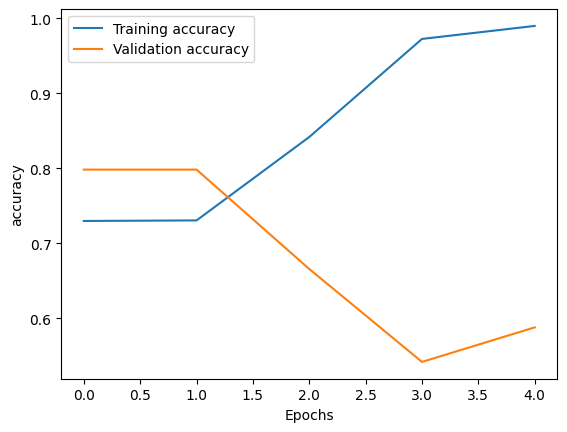

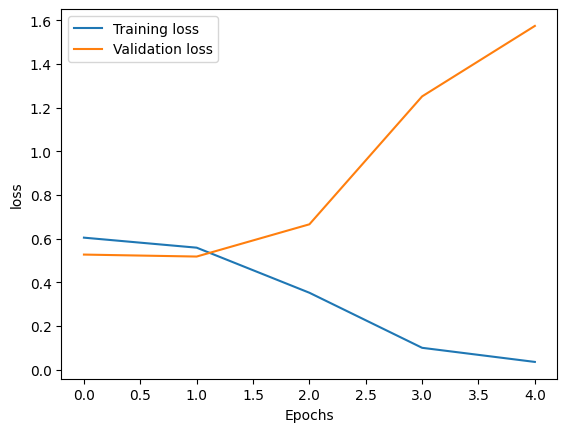

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(['Training ' +string, 'Validation '+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

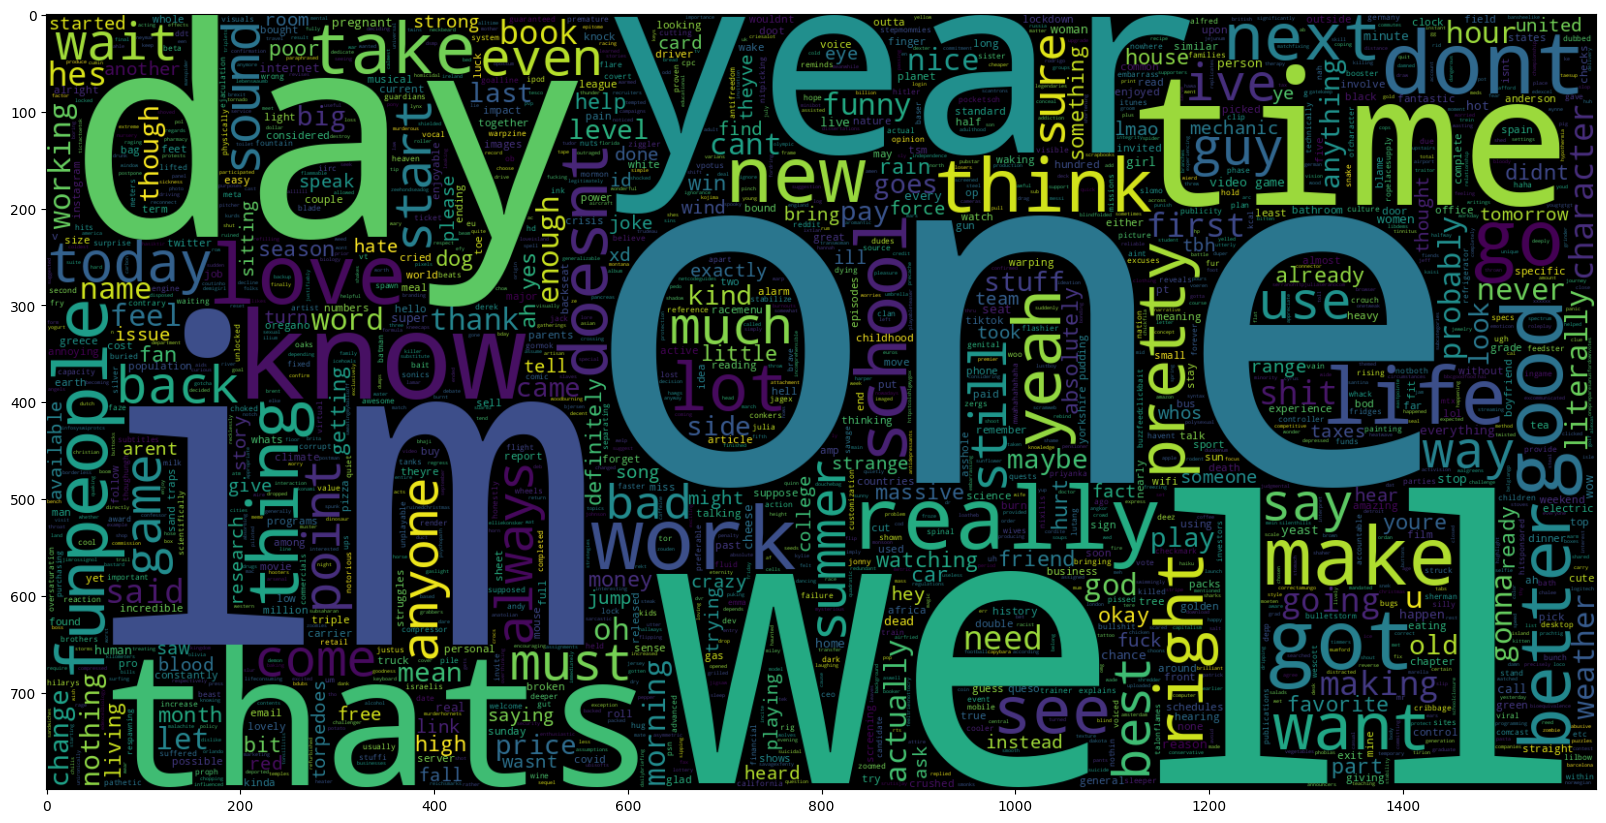

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 0].comment))
plt.imshow(wc , interpolation = 'bilinear')

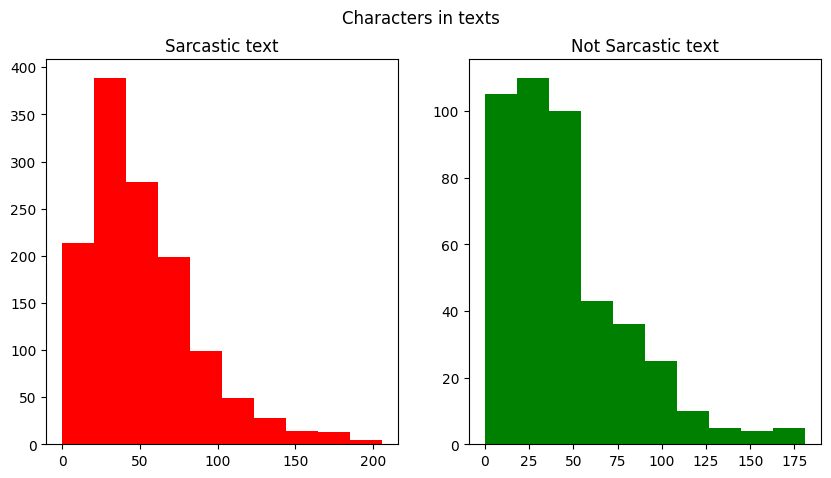

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['label']==1]['comment'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Sarcastic text')
text_len=df[df['label']==0]['comment'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Characters in texts')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

test_predictions = model.predict(test_padded)
test_predictions = (test_predictions > 0.5).astype(int) 

print(f'Test predictions: {test_predictions[:10].flatten()}')
print(f'Test labels: {test_labels[:10]}')

accuracy = accuracy_score(test_labels, test_predictions)
print(f'Accuracy: {accuracy}')

precision = precision_score(test_labels, test_predictions)
print(f'Precision: {precision}')

recall = recall_score(test_labels, test_predictions)
print(f'Recall: {recall}')

f1 = f1_score(test_labels, test_predictions)
print(f'F1 Score: {f1}')


11/11 [==============================] - 2s 92ms/step
Test predictions: [1 1 1 1 1 1 0 1 1 1]
Test labels: 1385    1
1386    1
1387    1
1388    1
1389    1
1390    1
1391    1
1392    1
1393    1
1394    1
Name: label, dtype: int64
Accuracy: 0.5878962536023055
Precision: 0.8130841121495327
Recall: 0.628158844765343
F1 Score: 0.7087576374745418
